In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np

In [11]:
# dataset
data = np.genfromtxt('/content/drive/MyDrive/Advertising.csv', delimiter=',', skip_header=1)
np.random.shuffle(data)
N = data.shape[0]
X = data[:,1:4]
y = data[:,4:]
print(N,X,y)
# print(type(data))

200 [[204.1  32.9  46. ]
 [123.1  34.6  12.4]
 [  8.6   2.1   1. ]
 [ 36.9  38.6  65.6]
 [172.5  18.1  30.7]
 [197.6  23.3  14.2]
 [283.6  42.   66.2]
 [216.8  43.9  27.2]
 [180.8  10.8  58.4]
 [220.5  33.2  37.9]
 [ 96.2  14.8  38.9]
 [ 43.1  26.7  35.1]
 [193.7  35.4  75.6]
 [163.3  31.6  52.9]
 [239.3  15.5  27.3]
 [  8.7  48.9  75. ]
 [224.    2.4  15.6]
 [ 25.1  25.7  43.3]
 [165.6  10.   17.6]
 [  4.1  11.6   5.7]
 [141.3  26.8  46.2]
 [ 26.8  33.   19.3]
 [ 53.5   2.   21.4]
 [202.5  22.3  31.6]
 [112.9  17.4  38.6]
 [296.4  36.3 100.9]
 [ 93.9  43.5  50.5]
 [218.4  27.7  53.4]
 [240.1   7.3   8.7]
 [ 80.2   0.    9.2]
 [ 89.7   9.9  35.7]
 [ 44.5  39.3  45.1]
 [164.5  20.9  47.4]
 [182.6  46.2  58.7]
 [ 50.   11.6  18.4]
 [121.    8.4  48.7]
 [276.9  48.9  41.8]
 [109.8  14.3  31.7]
 [ 31.5  24.6   2.2]
 [171.3  39.7  37.7]
 [217.7  33.5  59. ]
 [140.3   1.9   9. ]
 [116.    7.7  23.1]
 [ 39.5  41.1   5.8]
 [ 25.6  39.    9.3]
 [239.8   4.1  36.9]
 [286.   13.9   3.7]
 [220.3  

In [12]:
# Normalize input data by using mean normalizaton
def mean_normalization(X):
  N = len(X)
  maxi = np.max(X)
  mini = np.min(X)
  avg = np.mean(X)
  X = (X-avg) / (maxi -mini)
  X_b = np.c_[np.ones((N, 1)), X]
  return X_b , maxi , mini , avg

X_b, maxi, mini, avg = mean_normalization(X)
X_b

array([[ 1.00000000e+00,  4.62707490e-01, -1.14890351e-01,
        -7.06933198e-02],
       [ 1.00000000e+00,  1.89428138e-01, -1.09154858e-01,
        -1.84053644e-01],
       [ 1.00000000e+00, -1.96874157e-01, -2.18803981e-01,
        -2.22515182e-01],
       [ 1.00000000e+00, -1.01395074e-01, -9.56595816e-02,
        -4.56646424e-03],
       [ 1.00000000e+00,  3.56094804e-01, -1.64822874e-01,
        -1.22312753e-01],
       [ 1.00000000e+00,  4.40777665e-01, -1.47279015e-01,
        -1.77980769e-01],
       [ 1.00000000e+00,  7.30926113e-01, -8.41885965e-02,
        -2.54217274e-03],
       [ 1.00000000e+00,  5.05554993e-01, -7.77783401e-02,
        -1.34121120e-01],
       [ 1.00000000e+00,  3.84097503e-01, -1.89451754e-01,
        -2.88579622e-02],
       [ 1.00000000e+00,  5.18038124e-01, -1.13878205e-01,
        -9.80212551e-02],
       [ 1.00000000e+00,  9.86724022e-02, -1.75956478e-01,
        -9.46474359e-02],
       [ 1.00000000e+00, -8.04773954e-02, -1.35808030e-01,
      

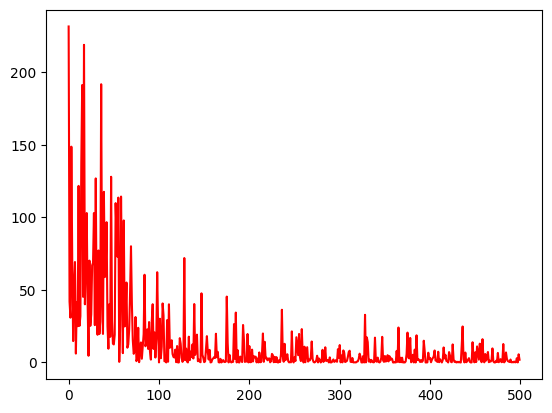

In [9]:
import matplotlib.pyplot as plt

def stochastic_gradient_descent(X_b, y, n_epochs=50, learning_rate=0.00001):
  # thetas = np.random.randn(4, 1)
  thetas = np.array([[1.16270837],
                     [-0.81960489],
                     [1.39501033],
                     [0.29763545]])
  thetas_path = [thetas]
  losses = []
  for epoch in range(n_epochs):
    for i in range(N):
      # select random number in N
      # random_index = np.random.randint(N)
      random_index = i
      xi = X_b[random_index]

      yi = y[random_index]
      # Compute output
      y_hat = xi.dot(thetas)
      # Compute loss li
      loss = (y_hat - yi)*(y_hat - yi) / 2
      loss = loss[0]
      # Compute gradient for loss
      g_li = (y_hat - yi)

      #Compute gradient
      dtheta = xi * g_li
      #update theta
      thetas = thetas - learning_rate * dtheta
      #logging
      thetas_path.append(thetas)
      losses.append(loss)

  return thetas_path, losses

sgd_theta, losses = stochastic_gradient_descent(X_b, y, n_epochs=50, learning_rate =0.01)
x_axis = list(range(500))
plt.plot(x_axis, losses[:500], color="r")
plt.show()

In [10]:
sgd_theta, losses = stochastic_gradient_descent(X_b, y, n_epochs=1, learning_rate =0.01)
print(np.sum(losses))

5727.483926514377


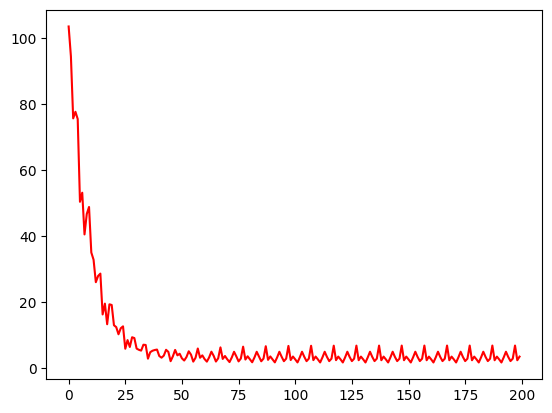

In [13]:
def mini_batch_gradient_descent(X_b, y, n_epochs=50, minibatch_size = 20, learning_rate=0.01):
  # thetas = np.random.randn(4, 1)
  thetas = np.asarray([[1.16270837], [-0.81960489], [1.39501033], [0.29763545]])
  thetas_path = [thetas]
  losses = []
  for epoch in range(n_epochs):
    # shuffled_indices = np.asarray([21, 144, 17, 107, 37, 115, 167, 31, 3, 179, 155, 36, 191, 182, 170, 27, 35, 162, 25, 28, 73, 172,
    #                                152, 102, 16, 11, 1, 34, 177, 29, 96, 22, 76, 196, 6, 128, 114, 117, 111, 43, 57, 126, 78, 151, 104,
    #                                110, 53, 181, 113, 173, 75, 23, 161, 85, 94, 18, 148, 190, 149, 79, 138, 20, 108, 137, 93, 192, 198,
    #                                153, 4, 45, 164, 26, 8, 131, 132, 185, 165, 169, 77, 80, 130, 127, 125, 61, 10, 175, 143, 87, 33, 50,
    #                                54, 97, 9, 84, 188, 139, 195, 72, 64, 194, 44, 109, 112, 60, 86, 90, 140, 171, 59, 199, 105, 41, 147,
    #                                92, 52, 124, 71, 197, 163, 98, 189, 103, 51, 39, 180, 74, 145, 118, 38, 47, 174, 100, 184, 183, 160,
    #                                69, 91, 82, 42, 89, 81, 186, 136, 63, 157, 46, 67, 129, 120, 116, 32, 19, 187, 70, 141, 146, 15, 58,
    #                                119, 12, 95, 0, 40, 83, 24, 168, 150, 178, 49, 159, 7, 193, 48, 30, 14, 121, 5, 142, 65, 176, 101, 55,
    #                                133, 13, 106, 66, 99, 68, 135, 158, 88, 62, 166, 156, 2, 134, 56, 123, 122, 154])
    # X_b_shuffled = X_b[shuffled_indices]
    # y_shuffled = y[shuffled_indices]

    for i in range(0, N, minibatch_size):
      xi = X_b[i:i+minibatch_size]
      yi = y[i:i+minibatch_size]
      # compute output
      y_hat = xi.dot(thetas)
      # compute loss
      loss = np.mean((y_hat - yi)**2) / 2
      # compute derivative of loss
      g_li = y_hat - yi
      # compute derivative of parameters
      gradients = np.mean(xi.T.dot(g_li))
      # update parameters
      thetas = thetas - learning_rate * gradients

      thetas_path.append(thetas)
      losses.append(loss)

  return thetas_path, losses

mbgd_thetas, losses = mini_batch_gradient_descent(X_b, y, n_epochs=50, minibatch_size = 20, learning_rate =0.01)
x_axis = list(range(200))
plt.plot(x_axis,losses[:200], color="r")
plt.show()

In [14]:
mbgd_thetas, losses = mini_batch_gradient_descent(X_b, y, n_epochs=50, minibatch_size = 20, learning_rate =0.01)
print(round(sum(losses),2))

2609.41


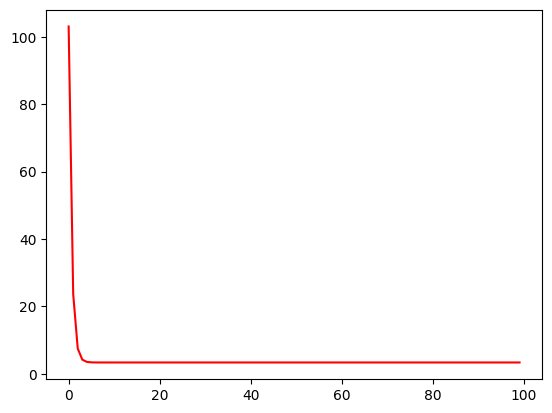

In [15]:
def batch_gradient_descent(X_b, y, n_epochs=100, learning_rate=0.01):
  # thetas = np.random.randn(4, 1)
  thetas = np.asarray([[1.16270837], [-0.81960489], [1.39501033], [0.29763545]])
  thetas_path = [thetas]
  losses = []
  for i in range(n_epochs):
    # compute output
    y_hat = X_b.dot(thetas)
    # Compute loss
    loss = np.mean((y_hat - y)**2) / 2
    # Compute losss’s derivative
    g_li = y_hat - y
    # computer parameters’ derivative
    gradients = np.mean(X_b.T.dot(g_li))
    # Update parameters
    thetas = thetas - learning_rate * gradients
    thetas_path.append(thetas)
    losses.append(loss)

  return thetas_path , losses

bgd_thetas, losses = batch_gradient_descent(X_b, y, n_epochs=100, learning_rate =0.01)
x_axis = list(range(100))
plt.plot(x_axis,losses[:100], color="r")
plt.show()

In [16]:
bgd_thetas, losses = batch_gradient_descent(X_b, y, n_epochs=100, learning_rate =0.01)
print(round(sum(losses),2))

458.72
